# 11. Segmentation: Clustering and Classification

Segmentation is not a well-defined process and analysts vary in their definitions of
segmentation as well as their approaches and philosophy.

We start with a warning: we have definite opinions about segmentation and what we
believe are common misunderstandings and poor practices.We hope you’ll be convinced
by our views—but even if not, the methods here will be useful to you.

## 11.1 Segmentation Philosophy

The general goal of market segmentation is to find groups of customers that differ in
important ways associated with product interest, market participation, or response
to marketing efforts.
- By understanding the differences among groups, a marketer
can make better strategic choices about opportunities, product definition, and positioning,
and can engage in more effective promotion.

### 11.1.1 The Difficulty of Segmentation

It is not particularly difficult to find groups within consumer data; indeed,
in this chapter we see several ways to do this, all of which “succeed” according to
one statistical criterion or another. Rather, the difficulty is to ensure that the outcome
is meaningful for a particular business need.
 - For segmentation this means that there is no all-purpose method or
algorithm that is a priori preferable to others. This does not mean that the choice of a
method is irrelevant or arbitrary; 
 - rather, one cannot necessarily determine in advance
which approach will work best for a novel problem. As a form of optimization,
segmentation is likely to require an iterative approach that successively tests and
improves its answer to a business need.

Segmentation is like slicing a pie, and any pie might be sliced in an infinite number
of ways. 
 - Your task as an analyst is to consider the infinity of possible data that
might be gathered, the infinity of possible groupings of that data, and the infinity of
possible business questions that might be addressed. 
 - Your goal is to find a solution
within those infinities that represents real differences in the data and that informs
and influences real business decisions.

To maximize chances of finding such a model, we recommend that an analyst
expects—and prepares management to understand—the need to iterate analyses.

### 11.1.2 Segmentation as Clustering and Classification

***clustering or cluster analysis and classification***. These are the primary branches of
what is sometimes called statistical learning, i.e., learning from data through statistical
model fitting.

## 11.2 Segmentation Data

In [3]:
seg.raw = read.csv("http://goo.gl/qw303p")
(seg.df  = seg.raw[, -7])              # remove the known segment assignments

age,gender,income,kids,ownHome,subscribe
47.31613,Male,49482.81,2,ownNo,subNo
31.38684,Male,35546.29,1,ownYes,subNo
43.20034,Male,44169.19,0,ownYes,subNo
37.31700,Female,81041.99,1,ownNo,subNo
40.95439,Female,79353.01,3,ownYes,subNo
43.03387,Male,58143.36,4,ownYes,subNo
37.55696,Male,19282.23,3,ownNo,subNo
28.45129,Male,47245.24,0,ownNo,subNo
44.20268,Female,48332.52,1,ownNo,subNo
35.15167,Female,52567.89,0,ownYes,subNo


> this is a simulated data set with four identified segments
of customers for a subscription product, and contains a few variables that are
similar to data from typical consumer surveys. Each observation has the simulated
respondent’s age, gender, household income, number of kids, home ownership, subscription
status, and assigned segment membership.
- The original data seg.raw contains “known” segment assignments that have been
provided for the data from some other source. 
- Because our task here is to discover segments, we create a copy
seg.df that omits those assignments (omitting column 7), so we don’t accidentally
include the known values when exploring applying segmentation methods.

In [5]:
summary(seg.df)

      age           gender        income            kids        ownHome   
 Min.   :19.26   Female:157   Min.   : -5183   Min.   :0.00   ownNo :159  
 1st Qu.:33.01   Male  :143   1st Qu.: 39656   1st Qu.:0.00   ownYes:141  
 Median :39.49                Median : 52014   Median :1.00               
 Mean   :41.20                Mean   : 50937   Mean   :1.27               
 3rd Qu.:47.90                3rd Qu.: 61403   3rd Qu.:2.00               
 Max.   :80.49                Max.   :114278   Max.   :7.00               
  subscribe  
 subNo :260  
 subYes: 40  
             
             
             
             

## 11.3 Clustering

To begin, we review two distance-based clustering methods, hclust() and
kmeans(). 
 - Distance-based methods attempt to find groups that minimize the distance
between members within the group, while maximizing the distance of members
from other groups. 
 - hclust() does this by modeling the data in a tree structure,
while kmeans() uses group centroids (central points).

Then we examine model-based clustering methods, Mclust() and poLCA().
Model-based methods view the data as a mixture of groups sampled from different
distributions, but whose original distribution and group membership has been “lost”
(i.e., is unknown). These methods attempt to model the data such that the observed
variance can be best represented by a small number of groups with specific distribution
characteristics such as different means and standard deviations. 
 - Mclust()
models the data as a mixture of Gaussian (normal) variables, while poLCA() uses
a latent class model with categorical (nominal) variables.

### 11.3.1 The Steps of Clustering

Clustering analysis requires two stages: finding a proposed cluster solution and evaluating
that solution for one’s business needs. For each method we go through the
following steps:
 - Transform the data if needed for a particular clustering method; for instance,
some methods require all numeric data (e.g., kmeans(), mclust()) or all
categorical data (e.g., poLCA()).
 - Compute a distance matrix if needed; some methods require a precomputed
matrix of similarity in order to group observations (e.g., hclust()) .
 - Apply the clustering method and save its result to an object. For some methods
this requires specifying the number (K) of groups desired (e.g., kmeans(),
poLCA()).
 - For some methods, further parse the object to obtain a solution with K groups
(e.g., hclust()).
 - Examine the solution in the model object with regard to the underlying data,
and consider whether it answers a business question.


#### 11.3.1.1. A Quick Check Function

A segment inspection function may be complex depending on the business need and
might even include plotting as well as data summarization. For purposes here we use
a simple function that reports the mean by group.

In [6]:
seg.summ = function(data, groups) {
  aggregate(data, list(groups), function(x) mean(as.numeric(x)))
}

> This function first splits the data by reported group (aggregate(. . ., list
(groups), . )). An anonymous function (function(x) . . . ) then converts
all of a group’s data to numeric (as.numeric(x)) and computes its mean().

With a summary function of this kind we are easily able to answer the following
questions related to the business value of a proposed solution:
- Are there obvious differences in group means?
- Does the differentiation point to some underlying story to tell?
- Do we see immediately odd results such as a mean equal to the value of one
data level?

In [7]:
seg.summ(seg.df, seg.raw$Segment)

Group.1,age,gender,income,kids,ownHome,subscribe
Moving up,36.33114,1.30,53090.97,1.914286,1.328571,1.200
Suburb mix,39.92815,1.52,55033.82,1.920000,1.480000,1.060
Travelers,57.87088,1.50,62213.94,0.000000,1.750000,1.125
Urban hip,23.88459,1.60,21681.93,1.100000,1.200000,1.200


In [15]:
# Why not use a standard R function such as by() or aggregate()?
# I dont know how i can use by().

by(seg.df, lapply(seg.raw, seg.raw$Segment), mean)

ERROR: Error in match.fun(FUN): 'seg.raw$Segment' is not a function, character or symbol


In [22]:
# Why not use a standard R function such as by() or aggregate()?

aggregate(.~ seg.raw$Segment, data = seg.df, FUN=mean)

seg.raw$Segment,age,gender,income,kids,ownHome,subscribe
Moving up,36.33114,1.30,53090.97,1.914286,1.328571,1.200
Suburb mix,39.92815,1.52,55033.82,1.920000,1.480000,1.060
Travelers,57.87088,1.50,62213.94,0.000000,1.750000,1.125
Urban hip,23.88459,1.60,21681.93,1.100000,1.200000,1.200


### 11.3.2 Hierarchical Clustering: hclust() Basics

Hierarchical clustering is a popular method that groups observations according to
their similarity. The hclust() method is one way to perform this analysis in R.
 - hclust() is a distance-based algorithm that operates on a ***dissimilarity *** matrix, an
N-by-N matrix that reports a metric for the distance between each pair of observations.

The hierarchical clustering method begins with each observation in its own cluster.
It then successively joins neighboring observations or clusters one at a time according
to their distances from one another, and continues this until all observations
are linked. 
- This process of repeatedly joining observations and groups is known as
an ***agglomerative*** method. Because it is both very popular and exemplary of other
methods, we present hierarchical clustering in more detail than the other clustering
algorithms.

The primary information in hierarchical clustering is the distance between observations.
 - There are many ways to compute distance, and we start by examining the
best-known method, the Euclidean distance. For two observations (vectors) X and
Y, the Euclidean distance d is:

<p style="text-align: center;"> $d = \sqrt{\sum(X-Y)^2}$ </p>


For single pairs of observations, such as X = {1,2,3} and Y = {2,3,2} we can
compute the distance easily in R:

In [25]:
c(1,2,3) - c(2,3,2)                  # vector of differences
sum((c(1,2,3) - c(2,3,2))^2)         # the sum of squared differences
sqrt(sum((c(1,2,3) - c(2,3,2))^2))   # root sum of squares

[1] -1 -1  1

[1] 3

[1] 1.732051

When there are many pairs, this can be done with the dist() function. Let’s check
it first for the simple X,Y example, using rbind() to group these vectors as observations
(rows):

In [26]:
dist(rbind(c(1,2,3), c(2,3,2)))

         1
2 1.732051

> The row and column labels tell us that dist() is returning a matrix for observation
1 (column) by observation 2 (row).

In [28]:
#if cbind()?
dist(cbind(c(1,2,3), c(2,3,2)))

         1        2
2 1.414214         
3 2.000000 1.414214

A limitation is that Euclidean distance is only defined when observations are numeric If we did
not care about the factor variables, then we could compute Euclidean distance using
only the numeric columns.
- For example, we can select the three numeric columns in seg.df, calculate the distances,
and then look at a matrix for just the first five observations as follows:

In [29]:
d = dist(seg.df[, c("age", "income", "kids")])
as.matrix(d)[1:5, 1:5]

,1,2,3,4,5
1,0.000,13936.531,5313.626,31559.178,29870.205
2,13936.531,0.000,8622.906,45495.698,43806.727
3,5313.626,8622.906,0.000,36872.800,35183.828
4,31559.178,45495.698,36872.800,0.000,1688.977
5,29870.205,43806.727,35183.828,1688.977,0.000


For seg.df we cannot assume that factor variables are irrelevant to our cluster
definitions; ***it is better to use all the data. ***
- The daisy() function in the cluster
package [108] works with mixed data types by rescaling the values, so we use that
instead of Euclidean distance:

In [36]:
library(cluster)            # daisy works with mixed data types

In [38]:
seg.dist = daisy(seg.df)
as.matrix(seg.dist)[1:5, 1:5]

,1,2,3,4,5
1,0.0000000,0.2532815,0.2329028,0.2617250,0.4161338
2,0.2532815,0.0000000,0.0679978,0.4129493,0.3014468
3,0.2329028,0.0679978,0.0000000,0.4246012,0.2932957
4,0.2617250,0.4129493,0.4246012,0.0000000,0.2265436
5,0.4161338,0.3014468,0.2932957,0.2265436,0.0000000


> We inspect the distances computed by daisy() by coercing the resulting object to
a matrix and selecting the first few rows and columns:
 - The distances look reasonable (zeroes on the diagonal, symmetric, scaled [0, 1]) 

So
we proceed to the hierarchical cluster method itself, invoking hclust() on the
dissimilarity matrix:

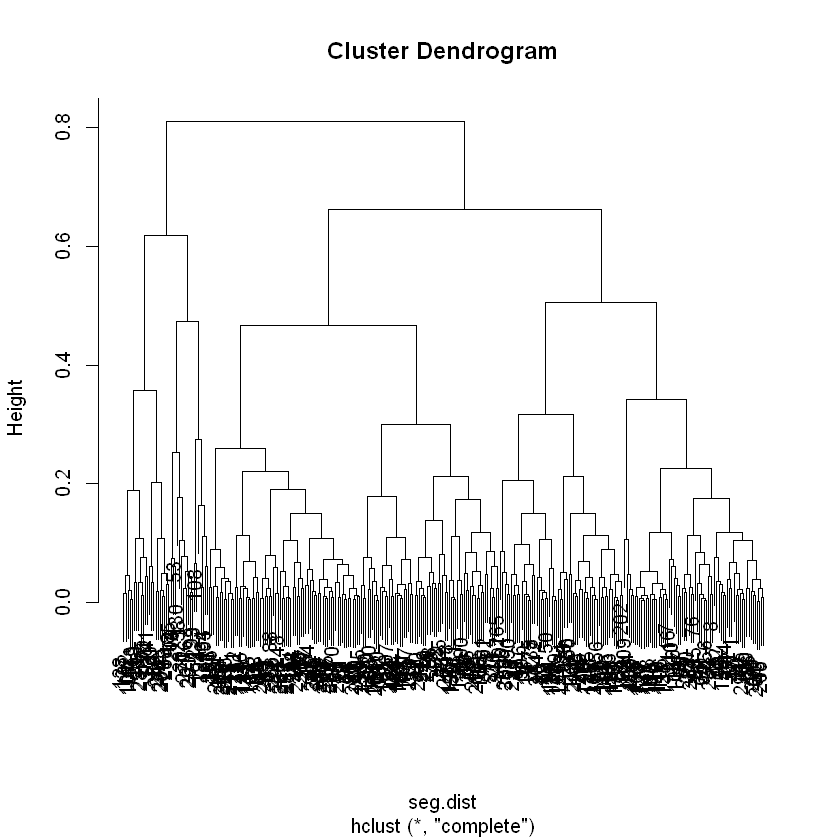

In [43]:
seg.hc = hclust(seg.dist, method="complete")
plot(seg.hc)

We use the complete linkage method, which evaluates the distance between every
member when combining observations and groups.
- The resulting tree for all N = 300 observations of seg.df is shown in
Fig. 11.1.

A hierarchical dendrogram is interpreted primarily by height and where observations
are joined. The height represents the dissimilarity between elements that are
joined.
- At the lowest level of the tree in Fig. 11.1 we see that elements are combined
into small groups of 2–10 that are relatively similar, and then those groups are
successively combined with less similar groups moving up the tree.
- The horizontal
ordering of branches is not important; branches could exchange places with no
change in interpretation.

Figure 11.1 is difficult to read, so it is helpful to zoom in on one section of the chart.
- We can cut it at a specified location and plot just one branch as follows.We coerce it
to a dendrogram object (as.dendrogram(. . . )), cut it at a certain height (h=. . . ),
and select the resulting branch that we want (. . . $lower[[1]]).

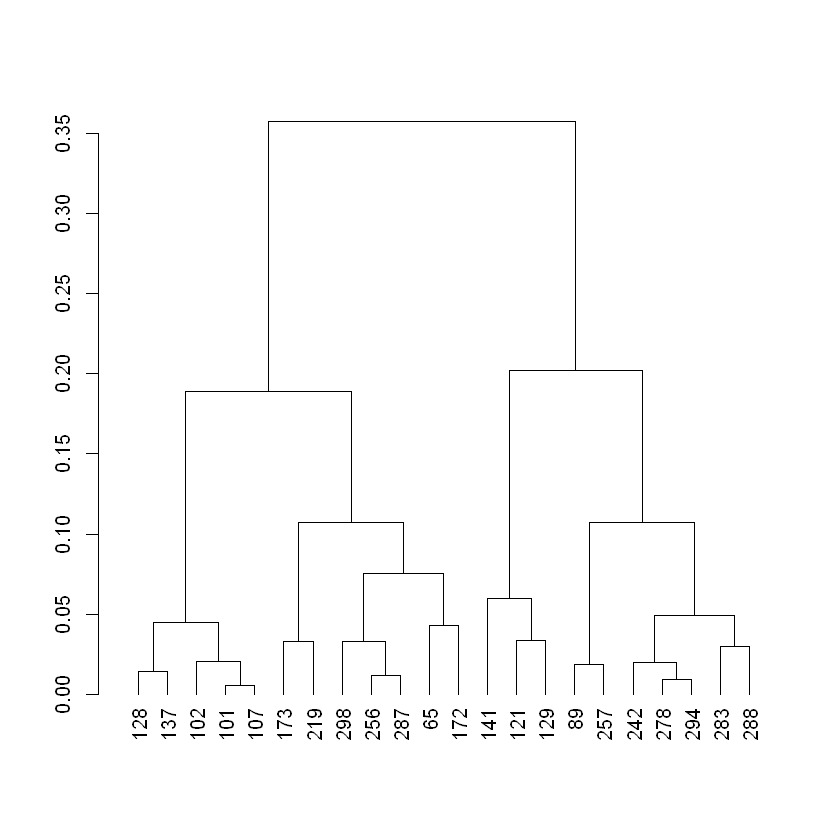

In [45]:
plot(cut(as.dendrogram(seg.hc), h=0.5)$lower[[1]])

> The result is shown in Fig. 11.2, where we are now able to read the observation labels
(which defaults to the row names—usually the row numbers—of observations
in the data frame). Each node at the bottom represents one customer, and the brackets
show how each has been grouped progressively with other customers.
- We can check the similarity of observations by selecting a few rows listed in
Fig. 11.2. Observations 101 and 107 are represented as being quite similar because
they are linked at a very low height, as are observations 278 and 294. On the other
hand, observations 173 and 141 are only joined at the highest level of this branch
and thus should be relatively dissimilar.

In [56]:
seg.df[c(101, 107), ]                # similar
seg.df[c(278, 294), ]                # similar
seg.df[c(173, 141), ]                # less similar

,age,gender,income,kids,ownHome,subscribe
101,24.73796,Male,18457.85,1,ownNo,subYes
107,23.19013,Male,17510.28,1,ownNo,subYes


,age,gender,income,kids,ownHome,subscribe
278,36.23860,Female,46540.88,1,ownNo,subYes
294,35.79961,Female,52352.69,1,ownNo,subYes


,age,gender,income,kids,ownHome,subscribe
173,64.70641,Male,45517.15,0,ownNo,subYes
141,25.17703,Female,20125.80,2,ownNo,subYes


>The first two sets—observations that are neighbors in the dendrogram—are similar
on all variables (age, gender, income, etc.). The third set—observations taken from
widely separated branches—differs substantially on the first four variables.

Finally, we might check one of the goodness-of-fit metrics for a hierarchical cluster
solution. 
 - One method is the cophenetic correlation coefficient (CPCC), which
assesses how well a dendrogram (in this case seg.hc) matches the true distance
metric (seg.dist) [145]. We use cophenetic() to get the distances from the
dendrogram, and compare it to the dist() metrics with cor():

In [58]:
cor(cophenetic(seg.hc), seg.dist)

[1] 0.7682436

> CPCC is interpreted similarly to Pearson’s r. In this case, CPCC > 0.7 indicates
a relatively strong fit, meaning that the hierarchical tree represents the distances
between customers well.

### 11.3.3 Hierarchical Clustering Continued: Groups from hclust()

How do we get specific segment assignments? A dendrogram can be cut into clusters
at any height desired, resulting in different numbers of groups. 
 - For instance, if
Fig. 11.1 is cut at a height of 0.7, there are K = 2 groups (draw a horizontal line at
0.7 and count how many branches it intersects; each cluster below is a group), while
cutting at height of 0.4 defines K = 7 groups.

We can see where the dendrogram would be cut by overlaying
its plot() with rect.hclust(), specifying the number of groups we want
(k=. . . ):

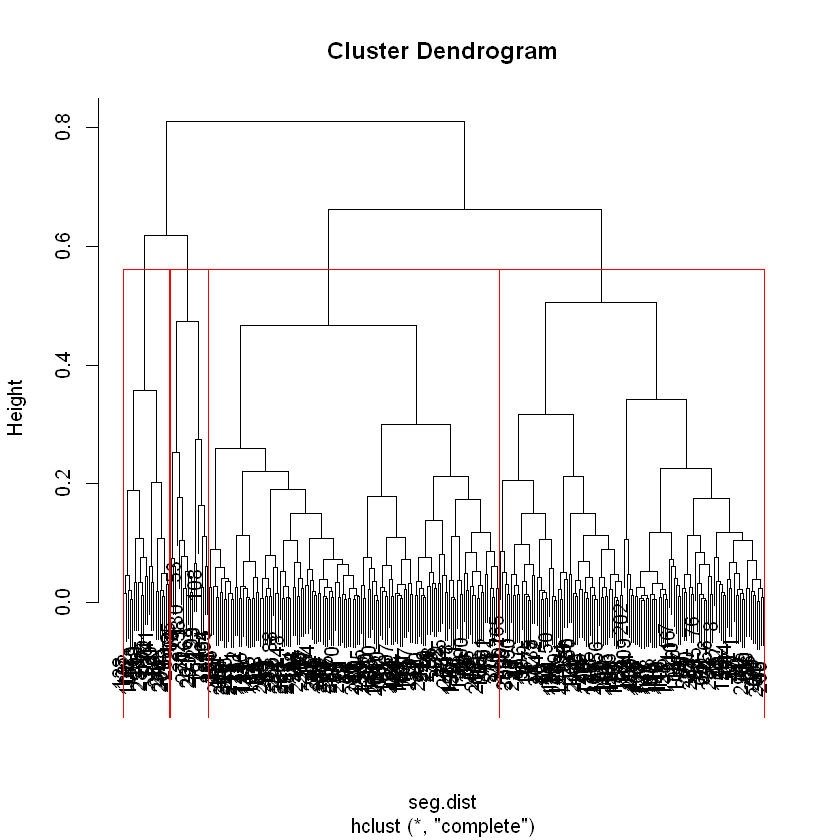

In [60]:
plot(seg.hc)
rect.hclust(seg.hc, k=4, border="red")

> Fig. 11.3. The result of cutting Fig. 11.1 into K = 4 groups.

We obtain the assignment vector for observations using cutree():

In [62]:
seg.hc.segment = cutree(seg.hc, k=4)     # membership vector for 4 groups
table(seg.hc.segment)

seg.hc.segment
  1   2   3   4 
124 136  18  22 

>We see that groups 1 and 2 dominate the assignment. Note that the class labels
(1, 2, 3, 4) are in arbitrary order and are not meaningful in themselves.
seg.hc.segment is the vector of group assignments.

We use our custom summary function seg.summ(), defined above, to inspect the
variables in seg.df with reference to the four clusters:

In [63]:
seg.summ(seg.df, seg.hc.segment)

Group.1,age,gender,income,kids,ownHome,subscribe
1,40.78456,2.000000,49454.08,1.314516,1.467742,1
2,42.03492,1.000000,53759.62,1.235294,1.477941,1
3,44.31194,1.388889,52628.42,1.388889,2.000000,2
4,35.82935,1.545455,40456.14,1.136364,1.000000,2


> We see that groups 1 and 2 are distinct from 3 and 4 due to subscription status.
- Among those who do not subscribe, group 1 is all male (gender=2 as in
levels(seg.df$gender)) while group 1 is all female. 
- Subscribers are differentiated
into those who own a home (group 3) or not (group 4).

We confirm this with a quick plot of gender by subscribe with all of the observations
colored by segment membership. To do this, we use a trick: 
- we convert the
factor variables to numeric, and call the jitter() function to add a bit of noise
and prevent all the cases from being plotted at the same positions (namely at exactly
four points: (1,1), (1,2), (2,1), and (2,2)). 
- We color the points by segment with
col=seg.hc.segment, and label the axes with more meaningful labels:

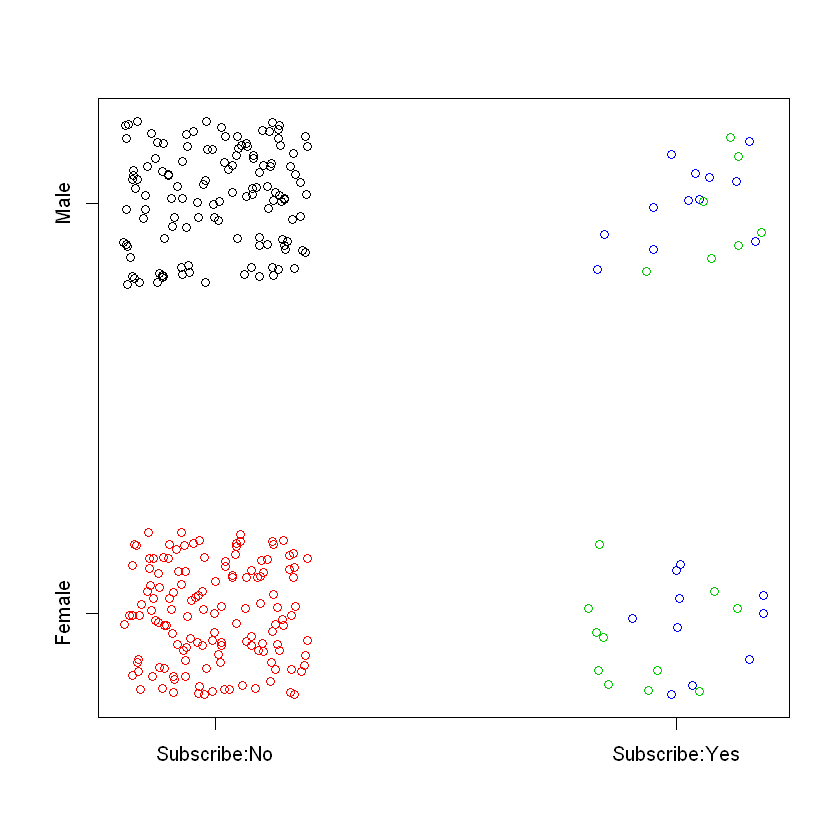

In [65]:
plot(jitter(as.numeric(seg.df$gender))~ jitter(as.numeric(seg.df$subscribe)), 
     col = seg.hc.segment, yaxt='n', xaxt='n', ylab='', xlab='')
axis(1, at=c(1,2), labels=c('Subscribe:No', 'Subscribe:Yes'))
axis(2, at=c(1,2), labels=levels(seg.df$gender))

> Fig. 11.4. Plotting the 4-segment solution from hclust() by gender and subscription status,
with color representing segment membership. We see the uninteresting result that nonsubscribers
are simply divided into two segments purely on the basis of gender.

Why did hclust() find a result that is so uninteresting? That may be answered
in several ways. 
 - For one thing, machine learning techniques often take the path of
least resistance and serve up obvious results. In this specific case, the scaling in
daisy() rescales variables to [0,1] and this will make two-category factors (gender,
subscription status, home ownership) more influential. 
 - Overall, this demonstrates
why you should expect to try several methods and iterate in order to find
something useful.

### 11.3.4 Mean-Based Clustering: kmeans()

K-means clustering attempts to find groups that are most compact, in terms of the
mean sum-of-squares deviation of each observation from the multivariate center
(centroid) of its assigned group. Like hierarchical clustering, k-means is a very popular
approach.
- Because it explicitly computes a mean deviation, k-means clustering relies on Euclidean
distance. Thus it is only appropriate for numeric data or data that can be
reasonably coerced to numeric.
- In our seg.df data, we have a mix of numeric
and binary factors. Unlike higher-order categorical variables, binary factors can be
coerced to numeric with no alteration of meaning.

Although it is not optimal to cluster binary values with k-means, given that we have
a mixture of binary and numeric data, we might attempt it. 
 - Our first step is to create
a variant of seg.df that is recoded to numeric. We make a copy of seg.df and
use ifelse() to recode the binary factors:

In [67]:
seg.df.num = seg.df
seg.df.num$gender    = ifelse(seg.df$gender    == 'Male',  0, 1)
seg.df.num$ownHome   = ifelse(seg.df$ownHome   == 'ownNo', 0, 1)
seg.df.num$subscribe = ifelse(seg.df$subscribe == 'subNo', 0, 1)
summary(seg.df.num)

# There are several ways to recode data, but ifelse() is simple and explicit 

      age            gender           income            kids     
 Min.   :19.26   Min.   :0.0000   Min.   : -5183   Min.   :0.00  
 1st Qu.:33.01   1st Qu.:0.0000   1st Qu.: 39656   1st Qu.:0.00  
 Median :39.49   Median :1.0000   Median : 52014   Median :1.00  
 Mean   :41.20   Mean   :0.5233   Mean   : 50937   Mean   :1.27  
 3rd Qu.:47.90   3rd Qu.:1.0000   3rd Qu.: 61403   3rd Qu.:2.00  
 Max.   :80.49   Max.   :1.0000   Max.   :114278   Max.   :7.00  
    ownHome       subscribe     
 Min.   :0.00   Min.   :0.0000  
 1st Qu.:0.00   1st Qu.:0.0000  
 Median :0.00   Median :0.0000  
 Mean   :0.47   Mean   :0.1333  
 3rd Qu.:1.00   3rd Qu.:0.0000  
 Max.   :1.00   Max.   :1.0000  

We now run the kmeans() algorithm, which specifically requires specifying the
number of clusters to find. We ask for four clusters with centers=4:

In [69]:
set.seed(96743)
seg.k= kmeans(seg.df.num, centers=4)
seg.summ(seg.df, seg.k$cluster)

Group.1,age,gender,income,kids,ownHome,subscribe
1,56.37245,1.428571,92287.07,0.4285714,1.857143,1.142857
2,29.58704,1.571429,21631.79,1.0634921,1.301587,1.158730
3,44.42051,1.452632,64703.76,1.2947368,1.421053,1.073684
4,42.08381,1.454545,48208.86,1.5041322,1.528926,1.165289


In [71]:
aggregate(.~seg.k$cluster, data=seg.df, mean)    # or aggregate()

seg.k$cluster,age,gender,income,kids,ownHome,subscribe
1,56.37245,1.428571,92287.07,0.4285714,1.857143,1.142857
2,29.58704,1.571429,21631.79,1.0634921,1.301587,1.158730
3,44.42051,1.452632,64703.76,1.2947368,1.421053,1.073684
4,42.08381,1.454545,48208.86,1.5041322,1.528926,1.165289


> Unlike with hclust() we now see some interesting differences; the groups appear
to vary by age, gender, kids, income, and home ownership. 

For example, we can
visually check the distribution of income according to segment (which kmeans()
stored in seg.k$cluster) using boxplot():

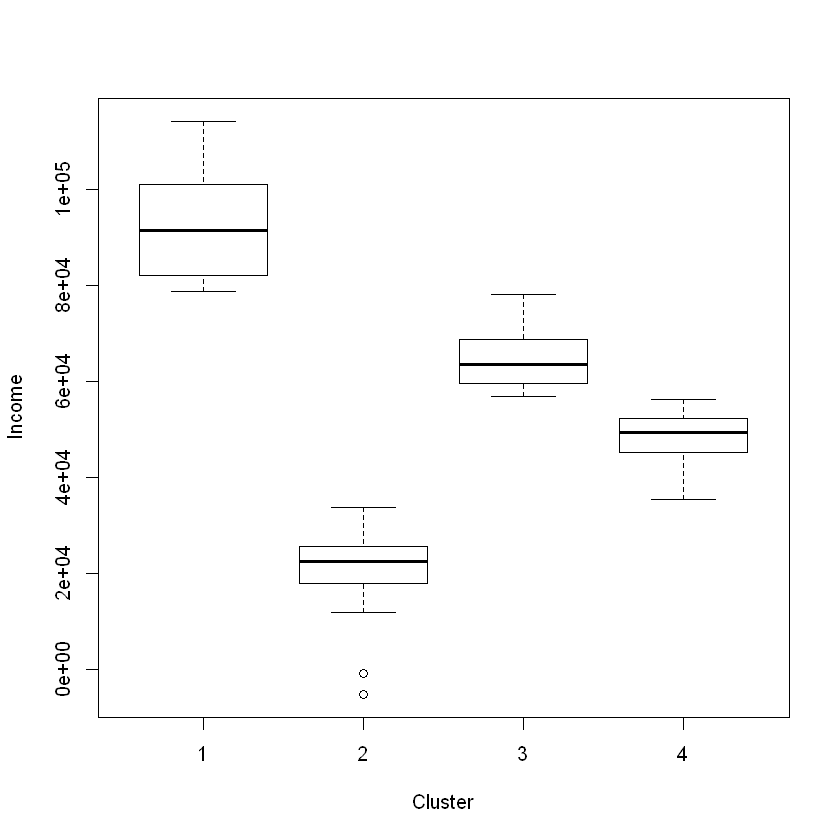

In [72]:
boxplot(seg.df.num$income ~ seg.k$cluster, ylab='Income', xlab='Cluster')

> The result is Fig. 11.5, which shows substantial differences in income by segment.
Note that in clustering models, the group labels are in arbitrary order, so don’t worry
if your solution shows the same pattern with different labels.

We visualize the clusters by plotting them against a dimensional plot.
clusplot() will perform dimensional reduction with principal components or
multidimensional scaling as the data warrant, and then plot the observations with
cluster membership identified (see Chap. 8 to review principal component analysis
and plotting.) 
 - We use clusplot from the cluster package with arguments to
color the groups, shade the ellipses for group membership, label only the groups
(not the individual points) with labels=4, and omit distance lines between groups
(lines=0):

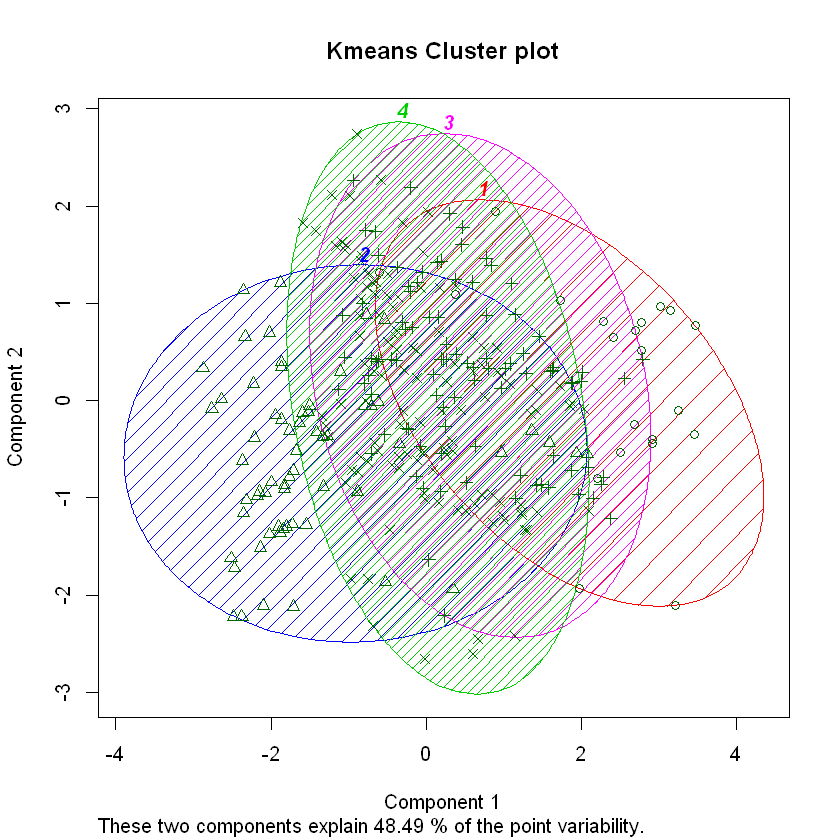

In [74]:
library(cluster)
clusplot(seg.df, seg.k$cluster, color=T, shade=T, labels=4, lines=0, 
         main='Kmeans Cluster plot')

> The code produces the plot in Fig. 11.6, which plots cluster assignment by color and
ellipses against the first two principal components of the predictors (see Sect. 8.2.2).
 - Groups 3 and 4 are largely overlapping (in this dimensional reduction) while group
1 and especially group 2 are modestly differentiated.

1. Overall, this is a far more interesting cluster solution for our segmentation data than
the hclust() proposal. The groups here are clearly differentiated on key variables
such as age and income.With this information, an analyst might cross-reference the
group membership with key variables

2. This may suggest a business strategy. 
 - In the present case, for instance, we see
that group 1 is modestly well differentiated, and has the highest average income. That may make it a good target for a potential campaign. Many other strategies are possible, too; the key point is that the analysis provides interesting options to
consider.

3. A limitation of k-means analysis is that it requires specifying the number of clusters,
and it can be difficult to determine whether one solution is better than another. 
 - If we
were to use k-means for the present problem, we would repeat the analysis for k =3,
4, 5, and so forth, and determine which solution gives the most useful result for our
business goals.

### 11.3.5 Model-Based Clustering: Mclust()

The key idea for model-based clustering is that observations come from groups
with different statistical distributions (such as different means and variances). The
algorithms try to find the best set of such underlying distributions to explain the
observed data. 
- We use the mclust package [53, 54] to demonstrate this.

Such models are also known as “mixture models” because it is assumed that the
data reflect a mixture of observations drawn from different populations, although we
don’t know which population each observation was drawn from. We are trying to
estimate the underlying population parameters and the mixture proportion. 
- mclust
models such clusters as being drawn from a mixture of ***normal (also known as Gaussian***)
distributions.

As you might guess, because mclust models data with normal distributions, it uses
only numeric data. 
 - We use the numeric data frame seg.df.num that we adapted
for kmeans() in Sect. 11.3.4; see that section for the code if needed. The model is
estimated with Mclust() (note the capital letter for the fitting function, as opposed
to the package name):

In [75]:
library(mclust)
seg.mc = Mclust(seg.df.num)
summary(seg.mc)

Warning message:
"package 'mclust' was built under R version 3.4.4"Package 'mclust' version 5.4
Type 'citation("mclust")' for citing this R package in publications.


----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust VEV (ellipsoidal, equal shape) model with 3 components:

 log.likelihood   n df       BIC       ICL
      -5137.106 300 73 -10690.59 -10690.59

Clustering table:
  1   2   3 
163  71  66 

> This tells us that the data are estimated to have three clusters (components) with
the sizes as shown in the table.
 - Mclust() compared a variety of different mixture
shapes and concluded that an ellipsoidal model (modeling the data as multivariate
ellipses) fit best.
 - We also see log-likelihood information, which we can use to compare models

We try a 4-cluster solution by telling Mclust() the number of clusters we want with
the G=4 argument:

In [76]:
seg.mc4 = Mclust(seg.df.num, G=4)
summary(seg.mc4)

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust VII (spherical, varying volume) model with 4 components:

 log.likelihood   n df       BIC       ICL
      -16862.69 300 31 -33902.19 -33906.18

Clustering table:
  1   2   3   4 
104  66  59  71 

>Forcing it to find four clusters resulted in quite a different model, with lower loglikelihood, different multivariate pattern (diagonal), and no obvious correspondence
in the cluster table (for instance, it’s not simply that one of the groups in the
3-cluster solution was split into two).